classification model building::

Blood_pressure::categorical dataset::
To undentify the best fitted model for identifying blood pressure abnormality by considering other dependent variables.

In [210]:
import pandas as pd
bp=pd.read_csv(r"E:\Python Dataset\blood_pressure.csv")
bp.shape
bp.head()
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#AUC_ROC CURVE=Area Under Curve of Receiver Operating Characteristics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#PRC =Precision Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
import warnings 
warnings.filterwarnings('ignore')
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [4]:
bp.head()
bp.tail()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1
1999,2000,1,11.36,0.09,41,45,0,NaN,0,20729,30463,230.0,1,1,0


In [5]:
bp.shape

(2000, 15)

In [6]:
bp.drop(["Blood_Pressure_Abnormality"],axis=1)

,Patient_Number,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [7]:
bp.shape

(2000, 15)

preprocessing:

In [9]:
bp.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [10]:
bp.Genetic_Pedigree_Coefficient.value_counts()

Genetic_Pedigree_Coefficient
0.86    32
0.13    30
0.63    28
0.56    27
0.17    27
        ..
0.78    11
0.91    11
0.16    10
0.15     9
0.65     9
Name: count, Length: 101, dtype: int64

In [11]:
bp.Genetic_Pedigree_Coefficient=bp.Genetic_Pedigree_Coefficient.fillna(bp.Genetic_Pedigree_Coefficient.median())

In [12]:
bp.Genetic_Pedigree_Coefficient.value_counts()

Genetic_Pedigree_Coefficient
0.49    112
0.86     32
0.13     30
0.63     28
0.56     27
       ... 
0.78     11
0.91     11
0.16     10
0.15      9
0.65      9
Name: count, Length: 101, dtype: int64

In [13]:
bp.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient        0
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [14]:
bp.Pregnancy.value_counts()

Pregnancy
0.0    243
1.0    199
Name: count, dtype: int64

In [15]:
bp.Pregnancy=bp.Pregnancy.fillna("1.0")

In [16]:
bp.Pregnancy.value_counts()

Pregnancy
1.0    1558
0.0     243
1.0     199
Name: count, dtype: int64

In [17]:
bp.alcohol_consumption_per_day.value_counts()

alcohol_consumption_per_day
253.0    11
401.0    10
302.0    10
144.0    10
485.0     9
         ..
21.0      1
406.0     1
346.0     1
244.0     1
326.0     1
Name: count, Length: 488, dtype: int64

In [18]:
bp.alcohol_consumption_per_day=bp.alcohol_consumption_per_day.fillna(bp.alcohol_consumption_per_day.median())

In [19]:
bp.alcohol_consumption_per_day.value_counts()

alcohol_consumption_per_day
250.0    249
253.0     11
302.0     10
144.0     10
401.0     10
        ... 
21.0       1
406.0      1
346.0      1
244.0      1
326.0      1
Name: count, Length: 488, dtype: int64

In [20]:
bp.dtypes

Patient_Number                     int64
Blood_Pressure_Abnormality         int64
Level_of_Hemoglobin              float64
Genetic_Pedigree_Coefficient     float64
Age                                int64
BMI                                int64
Sex                                int64
Pregnancy                         object
Smoking                            int64
Physical_activity                  int64
salt_content_in_the_diet           int64
alcohol_consumption_per_day      float64
Level_of_Stress                    int64
Chronic_kidney_disease             int64
Adrenal_and_thyroid_disorders      int64
dtype: object

In [21]:
#bp.Genetic_Pedigree_Coefficient.value_counts()

In [22]:
#bp["Pregnancy"]=le.fit_transform(bp["Pregnancy"])

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['float', 'str']

In [ ]:
bp.dtypes

In [ ]:
bp.drop_duplicates(inplace=True)

In [ ]:
bp.shape

EDA:: class imbalance:

In [ ]:
#bp.Blood_Pressure_Abnormality.value_counts()

In [ ]:
#bp_x=bp.iloc[:,2:]

In [ ]:
#bp_y=bp.iloc[:,1]

In [ ]:
#from imblearn.over_sampling import RandomOverSampler
#a1=RandomOverSampler(random_state=52)
#x_over,y_over=a1.fit_resample(bp_x,bp_y)
#x_over.shape,y_over.shape

In [ ]:
#y_over.value_counts()

outlier and skewness treatment::

In [ ]:
import seaborn as sns
sns.boxplot(data=bp,y="Patient_Number")#no outlier and skewness present.

In [ ]:
import seaborn as sns
sns.boxplot(data=bp,y="Blood_Pressure_Abnormality")#no outlier and skewness present.

In [ ]:
import seaborn as sns
sns.boxplot(data=bp,y="Level_of_Hemoglobin")

In [ ]:
bp.Level_of_Hemoglobin.hist()

In [ ]:
sns.distplot(bp.Level_of_Hemoglobin)

In [ ]:
ub=bp["Level_of_Hemoglobin"].mean()+3*bp["Level_of_Hemoglobin"].std()
lb=bp["Level_of_Hemoglobin"].mean()-3*bp["Level_of_Hemoglobin"].std()
print(ub,lb)

In [ ]:
bp.Level_of_Hemoglobin.describe()

In [ ]:
bp.loc[bp["Level_of_Hemoglobin"]>ub,"Level_of_Hemoglobin"]=ub
sns.boxplot(bp.Level_of_Hemoglobin)

skewness treatment::

In [ ]:
sns.distplot(bp.Level_of_Hemoglobin)

In [ ]:
 bp.Level_of_Hemoglobin.skew()

In [ ]:
import numpy as np
np.log(0)

In [ ]:
bp.shape

In [ ]:
bp_new=bp[bp.Level_of_Hemoglobin>0]

In [ ]:
bp_new.shape

In [ ]:
bp["Level_of_Hemoglobin"]=np.log(bp["Level_of_Hemoglobin"])
bp.Level_of_Hemoglobin.skew()

In [ ]:
IQR=bp.Level_of_Hemoglobin.quantile(0.75)-bp.Level_of_Hemoglobin.quantile(0.25)
L1=bp["Level_of_Hemoglobin"].quantile(0.25)-(IQR*3)
U1=bp["Level_of_Hemoglobin"].quantile(0.75)+(IQR*3)
print(L1,U1)

In [ ]:
bp.loc[bp["Level_of_Hemoglobin"]>U1,"Level_of_Hemoglobin"]=U1
sns.distplot(bp.Level_of_Hemoglobin)

In [ ]:
import seaborn as sns
sns.boxplot(data=bp,y="Genetic_Pedigree_Coefficient")#no outlier and no skewness present.

In [ ]:
sns.distplot(bp.Genetic_Pedigree_Coefficient)

In [ ]:
import seaborn as sns
sns.boxplot(data=bp,y="Age")

In [ ]:
sns.distplot(bp.Age)#no outlier and no skewness present.

In [ ]:
import seaborn as sns
sns.boxplot(data=bp,y="BMI")

In [ ]:
sns.distplot(bp.BMI)#no outlier and no skewness present.

In [ ]:
import seaborn as sns
sns.boxplot(data=bp,y="Sex")#being categorical column no outlier and skewness need to perform.

In [ ]:
sns.distplot(bp.Sex)

In [ ]:
import seaborn as sns
sns.boxplot(data=bp,y="Pregnancy")

In [ ]:
sns.distplot(bp.Pregnancy)#being categorical column no outlier and skewness need to perform.

In [ ]:
# As Smoking being categorical column no outlier and skewness need to perform.

In [ ]:
import seaborn as sns
sns.boxplot(data=bp,y="Physical_activity")

In [ ]:
sns.distplot(bp.Physical_activity)#no outlier and no skewness present.

In [ ]:
import seaborn as sns
sns.boxplot(data=bp,y="salt_content_in_the_diet")

In [ ]:
sns.distplot(bp.salt_content_in_the_diet)#no outlier and no skewness present.

In [ ]:
import seaborn as sns
sns.boxplot(data=bp,y="alcohol_consumption_per_day")

In [ ]:
sns.distplot(bp.alcohol_consumption_per_day)#no outlier and no skewness present.

In [ ]:
import seaborn as sns
sns.boxplot(data=bp,y="Level_of_Stress")

In [ ]:
sns.distplot(bp.Level_of_Stress)#being categorical column no outlier and skewness need to perform.

In [ ]:
bp.dtypes

In [ ]:
import seaborn as sns
sns.boxplot(data=bp,y="Chronic_kidney_disease")

In [ ]:
sns.distplot(bp.Chronic_kidney_disease)#being categorical column no outlier and skewness need to perform.

In [ ]:
import seaborn as sns
sns.boxplot(data=bp,y="Adrenal_and_thyroid_disorders")#no outlier treatment is required .

In [ ]:
sns.distplot(bp.Adrenal_and_thyroid_disorders)#being categorical column no need for skewness treatment is required .

In [ ]:
bp1=bp.corr()
bp1

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(bp1)
plt.show()

train_test_split::

In [89]:
x=bp.iloc[:,2:]

In [91]:
x.head()
x.shape

(2000, 13)

In [93]:
y=bp.iloc[:,1]

In [95]:
y.head()
y.shape

(2000,)

In [97]:
import sklearn
from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=95)

In [101]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1600, 13), (1600,), (400, 13), (400,))

Model Building ::
Logistic regression::

In [103]:
log.fit(x_train,y_train)

LogisticRegression()

In [109]:
LogisticRegression()
p1=log.predict(x_test)
p1

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [107]:
pred_prob=log.predict_proba(x_test)
#pred_prob

array([[0.6239181 , 0.3760819 ],
       [0.49382025, 0.50617975],
       [0.68789039, 0.31210961],
       [0.58343531, 0.41656469],
       [0.39395883, 0.60604117],
       [0.58200927, 0.41799073],
       [0.37843818, 0.62156182],
       [0.55590564, 0.44409436],
       [0.6633493 , 0.3366507 ],
       [0.29604819, 0.70395181],
       [0.50723595, 0.49276405],
       [0.41376944, 0.58623056],
       [0.68313372, 0.31686628],
       [0.39939631, 0.60060369],
       [0.55968192, 0.44031808],
       [0.62140245, 0.37859755],
       [0.37512641, 0.62487359],
       [0.65087687, 0.34912313],
       [0.53470561, 0.46529439],
       [0.54816941, 0.45183059],
       [0.48675463, 0.51324537],
       [0.5930686 , 0.4069314 ],
       [0.61058388, 0.38941612],
       [0.39481471, 0.60518529],
       [0.49715691, 0.50284309],
       [0.56221259, 0.43778741],
       [0.43148613, 0.56851387],
       [0.5395748 , 0.4604252 ],
       [0.60897628, 0.39102372],
       [0.53793242, 0.46206758],
       [0.

In [111]:
M1=confusion_matrix(p1,y_test)
M1

array([[107,  92],
       [ 88, 113]], dtype=int64)

In [113]:
acc1=M1.diagonal().sum()/M1.sum()*100
acc1

55.00000000000001

In [115]:
print(classification_report(p1,y_test))

              precision    recall  f1-score   support

           0       0.55      0.54      0.54       199
           1       0.55      0.56      0.56       201

    accuracy                           0.55       400
   macro avg       0.55      0.55      0.55       400
weighted avg       0.55      0.55      0.55       400



In [117]:
df=pd.DataFrame(pred_prob)
df

,0,1
0,0.623918,0.376082
1,0.493820,0.506180
2,0.687890,0.312110
3,0.583435,0.416565
4,0.393959,0.606041
...,...,...
395,0.218604,0.781396
396,0.458000,0.542000
397,0.606443,0.393557
398,0.483747,0.516253


In [119]:
roc=roc_auc_score(p1,y_test)
roc

0.5499387484687117

In [121]:
fpr,tpr,threshold=roc_curve(y_test,df.iloc[:,1])

In [ ]:
#fpr

In [ ]:
#tpr

Text(0.5, 1.0, 'fpr_tpr')

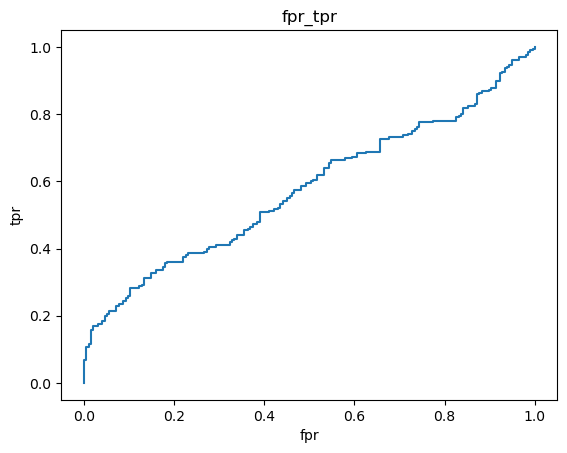

In [123]:
plt.plot(fpr,tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("fpr_tpr")

In [125]:
precision,recall,threshold=precision_recall_curve(y_test,df.iloc[:,1])

In [ ]:
#precision

In [ ]:
#recall

Text(0.5, 1.0, 'Pre_Recall ')

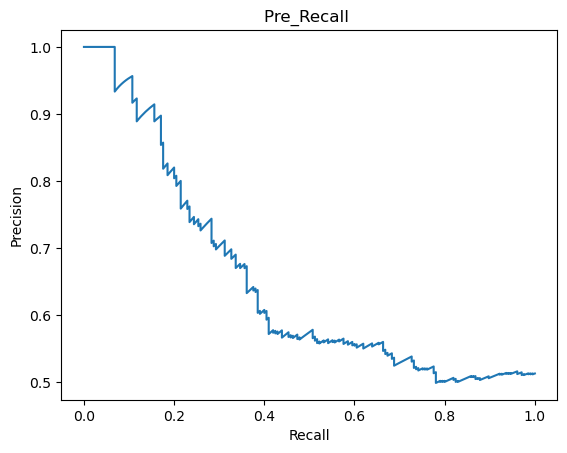

In [130]:
plt.plot(recall,precision,label="PRC_Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Pre_Recall ")

2.Decision Tree(DT)::

In [132]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [134]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [136]:
p2=dt.predict(x_test)
p2

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,

In [138]:
M2=confusion_matrix(p2,y_test)
M2

array([[146,  25],
       [ 49, 180]], dtype=int64)

In [140]:
acc2=M2.diagonal().sum()/M2.sum()*100
acc2

81.5

In [208]:
print(classification_report(p2,y_test))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       171
           1       0.88      0.79      0.83       229

    accuracy                           0.81       400
   macro avg       0.81      0.82      0.81       400
weighted avg       0.82      0.81      0.82       400



3 .Random Forest (RF)::

In [142]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [144]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [146]:
p3=rf.predict(x_test)
p3

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,

In [148]:
M3=confusion_matrix(p3,y_test)
M3

array([[159,  13],
       [ 36, 192]], dtype=int64)

In [150]:
acc3=M3.diagonal().sum()/M3.sum()*100
acc3

87.75

In [152]:
print(classification_report(p3,y_test))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       172
           1       0.94      0.84      0.89       228

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



4.KNN::

In [154]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=50)

In [156]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [158]:
p4=knn.predict(x_test)
p4

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,

In [160]:
M4=confusion_matrix(p4,y_test)
M4

array([[127, 136],
       [ 68,  69]], dtype=int64)

In [162]:
acc4=M4.diagonal().sum()/M4.sum()*100
acc4

49.0

In [ ]:
print(classification_report(p4,y_test))

In [168]:
#list=list()

In [170]:
for i in range(1,80):
 knn=KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 knn_pr=knn.predict(x_test)
 mat=confusion_matrix(knn_pr,y_test)
 acc=mat.diagonal().sum()/mat.sum()*100
 list.append(acc)

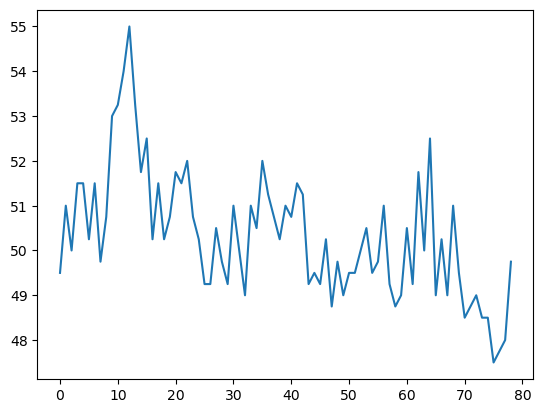

In [172]:
import matplotlib.pyplot as plt
p=plt.plot(list)

5 .SVM(Support Vector Machine)::

In [174]:
from sklearn.svm import SVC
svc=SVC()

In [176]:
svc.fit(x_train,y_train)

SVC()

In [178]:
p5=svc.predict(x_test)
p5

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,

In [180]:
M5=confusion_matrix(p5,y_test)
M5

array([[157, 150],
       [ 38,  55]], dtype=int64)

In [182]:
acc5=M5.diagonal().sum()/M5.sum()*100
acc5

53.0

6 .Naive Bayes::

In [184]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [186]:
nb.fit(x_train,y_train)

MultinomialNB()

In [188]:
p6=nb.predict(x_test)
p6

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,

In [190]:
M6=confusion_matrix(p6,y_test)
M6

array([[ 98, 110],
       [ 97,  95]], dtype=int64)

In [192]:
acc6=M6.diagonal().sum()/M6.sum()*100
acc6

48.25

In [194]:
print(classification_report(p6,y_test))

              precision    recall  f1-score   support

           0       0.50      0.47      0.49       208
           1       0.46      0.49      0.48       192

    accuracy                           0.48       400
   macro avg       0.48      0.48      0.48       400
weighted avg       0.48      0.48      0.48       400



7. XGBOOST::

In [ ]:
#!pip install xgboost

In [ ]:
#from xgboost import XGBClassifier
#xgb_model=XGBClassifier()

In [ ]:
#xgb_model.fit(x_train,y_train)

8.Feature selection model::

In [214]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [216]:
cst = SelectKBest(score_func = chi2, k ="all")

In [218]:
cst_fit=cst.fit(x_train,y_train)

In [220]:
cst_score = cst_fit.scores_
cst_score

array([1.32441853e+01, 2.85312595e-01, 3.29095647e+01, 1.59830213e+01,
       3.00983370e+00, 2.41524052e-01, 2.50906455e-01, 1.97670027e+04,
       1.18739124e+03, 2.33907175e+01, 1.42195489e-01, 1.50418990e+02,
       9.87992865e+01])

In [222]:
pdf = pd.DataFrame(cst_score)
pdf

,0
0,13.244185
1,0.285313
2,32.909565
3,15.983021
4,3.009834
5,0.241524
6,0.250906
7,19767.002657
8,1187.391237
9,23.390718


In [231]:
#pdf1 = pd.DataFrame({"featurescore":list(cst_score),"columns":list(df.iloc[:,2:15].columns)})
#pdf1

In [ ]:
Final Result::Without CI technique in confusion matrix the Tn value would be less , hence CI tech for target column should not be applied here .
    Hence DT model acc perfomance is highest among the 6 model building method to get the genralise model .
    Due to low acc performance the Feature Selection  has applied.